# Importing the necessary libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Loading our dataset

In [2]:

data=pd.read_csv('emails.csv')

In [3]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


# Data Preprocessing

In [4]:
data.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
data=data.set_index('Email No.', drop=True)
data

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Email 5168,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
Email 5169,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
Email 5170,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [8]:
n=len(data)
print(n)

5172


# Creating Traning & Testing Data

In [9]:
train = data[0:(n//10)*8]
test = data[(n//10)*8:]

In [10]:
y_train0 = train['Prediction']
y_test0 = test['Prediction']
X_train0 = train.drop('Prediction', axis = 1)
X_test0 = test.drop('Prediction', axis = 1)

In [11]:
X = np.array(X_train0)
y = np.array(y_train0)

# Building a Logistic Regression Model

In [12]:
model=LogisticRegression()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
X_train.shape, X_test.shape

((3308, 3000), (828, 3000))

In [15]:
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(np.array(X_test0))

# Checking the Accuray and Preformance of model

In [17]:
y_pred[0:10]

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [18]:
print(model.score(X_test, y_test))

0.9722222222222222


In [19]:
PRED=y_pred
ANS=y_test0
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.9372586872586872


In [20]:
y_test_prob = model.predict_proba(X_test)[:,1]

In [21]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_prob)
thresholds[0] = thresholds[0]-1

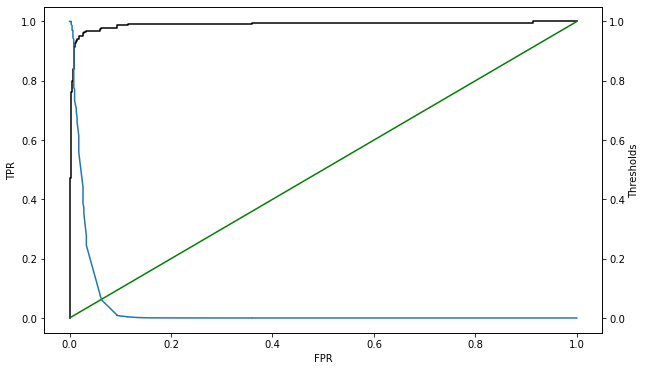

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(fpr,tpr,'black')
ax.plot(fpr,fpr,'green')
ax1=ax.twinx()
ax1.plot(fpr,thresholds)
ax1.set_ylabel("Thresholds")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
plt.show()

# ---------------------------------End of code ------------------------------------------------------